In [1]:
import mySDC
import numpy as np
from matplotlib import pyplot as plt

#### Benchmarking on a sample Dahlquist problem

In [2]:
l1, l2 = -10 + 0.j, -0.03j
t0, u0 = 0.0, 1.0 + 0.j

steps = 101 # t=0. -> t=1.
timestep = 0.01
t = np.linspace(t0, t0 + (steps-1) * timestep, steps)

u = np.zeros((steps), dtype=np.cfloat)
uv = np.zeros((steps), dtype=np.cfloat)

/opt/homebrew/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.10/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


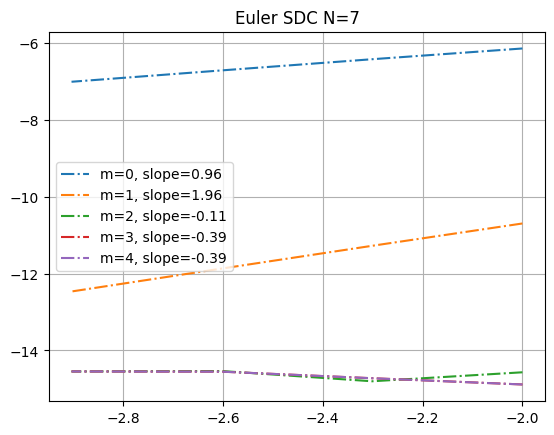

In [3]:
uv0 = u0 * np.exp(-t0 * l1)

N, M, folds = 7, 5, 4
fv = lambda t, x : x * l2

errors = np.zeros((M, folds), dtype="complex128")

for m in range(M):
    # errors in Lawson vars
    errors[m], tau = mySDC.benchmark(mySDC.Euler_SDC, (N, m, t, uv0, [fv]), lambda tt: np.exp(l2 * tt), folds, False)
    # error on u(t)
    errors[m] *= np.exp(tau * l1)
    # plot slopes
    slope, _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    plt.plot(np.log10(tau), np.log10(errors[m]), label='m=%d, slope=%.2f' % (m, slope.real), linestyle="-.")
plt.title('Euler SDC N=%d' % N)
plt.legend()
plt.grid()

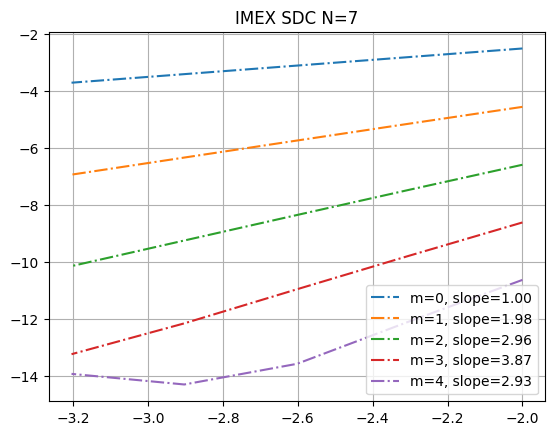

In [4]:
N, M, folds = 7, 5, 5
fn = lambda x : x * l2

errors = np.zeros((M, folds), dtype="complex128")

for m in range(M):
    # errors in Lawson vars
    errors[m], tau = mySDC.benchmark(mySDC.IMEXSDC, (N, m, t, u0, [l1, fn]), lambda tt: np.exp((l1 + l2) * tt), folds, False)
    # plot slopes
    slope, _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    plt.plot(np.log10(tau), np.log10(errors[m]), label='m=%d, slope=%.2f' % (m, slope.real), linestyle="-.")
plt.title('IMEX SDC N=%d' % N)
plt.legend()
plt.grid()

0 sweeps
timestep   |   max(E)   | cpu time [ms]
----------------------------
1.0000e-02 | 9.6939e-06 | 4741.02
5.0000e-03 | 4.8185e-06 | 9293.73
1 sweeps
timestep   |   max(E)   | cpu time [ms]
----------------------------
1.0000e-02 | 1.7522e-05 | 4686.93
5.0000e-03 | 8.6874e-06 | 9340.96
2 sweeps
timestep   |   max(E)   | cpu time [ms]
----------------------------
1.0000e-02 | 1.7522e-05 | 4687.10
5.0000e-03 | 8.6874e-06 | 9317.89
3 sweeps
timestep   |   max(E)   | cpu time [ms]
----------------------------
1.0000e-02 | 1.7522e-05 | 4686.77
5.0000e-03 | 8.6874e-06 | 9338.69
4 sweeps
timestep   |   max(E)   | cpu time [ms]
----------------------------
1.0000e-02 | 1.7522e-05 | 4696.95
5.0000e-03 | 8.6874e-06 | 9397.41


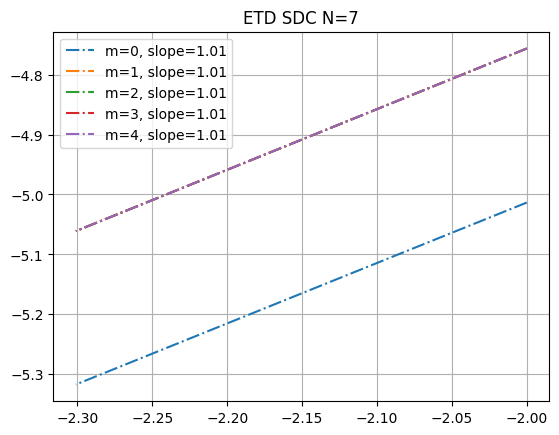

In [7]:
N, M, folds = 7, 5, 2
fn = lambda x : x * l2

errors = np.zeros((M, folds), dtype="complex128")

for m in range(M):
    # errors in Lawson vars
    errors[m], tau = mySDC.benchmark(mySDC.ETDSDC, (N, m, t, u0, [l1, fn]), lambda tt: np.exp((l1 + l2) * tt), folds, True)
    # plot slopes
    slope, _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    plt.plot(np.log10(tau), np.log10(errors[m]), label='m=%d, slope=%.2f' % (m, slope.real), linestyle="-.")
plt.title('ETD SDC N=%d' % N)
plt.legend()
plt.grid()